In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=lt---------lt-tso-0001entrylng%20terminals,lt---------lt-tso-0001entrytransmission,lt---------lt-tso-0001entrytransmissionee-lv------,lt---------lt-tso-0001exittransmission,lt---------lt-tso-0001exittransmissionee-lv------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesLTLT---------LT-TSO-0001entryLNG Te...        1   Aggregates   
1    1AggregatesLTLT---------LT-TSO-0001entryTransm...        1   Aggregates   
2    1AggregatesLTLT---------LT-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesLTLT---------LT-TSO-0001exitTransmi...        1   Aggregates   
4    1AggregatesLTLT---------LT-TSO-0001exitTransmi...        1   Aggregates   
..                                                 ...      ...          ...   
147  1AggregatesLTLT---------LT-TSO-0001entryLNG Te...        1   Aggregates   
148  1AggregatesLTLT---------LT-TSO-0001entryTransm...        1   Aggregates   
149  1AggregatesLTLT---------LT-TSO-0001entryTransm...        1   Aggregates   
150  1AggregatesLTLT---------LT-TSO-0001exitTransmi...        1   Aggregates   
151  1AggregatesLTLT---------LT-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day      value
0          entry    2   60026794
1          entry    2  162576866
2          entry    2          0
3           exit    2   94895811
4           exit    2   71648448
..           ...  ...        ...
147        entry    1  101574078
148        entry    1   82598869
149        entry    1          0
150         exit    1   83812954
151         exit    1   43105398

[152 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         6.139098e+07
    exit          6.345918e+07
2   entry         7.420122e+07
    exit          8.327213e+07
3   entry         7.555413e+07
...                        ...
29  exit          7.399186e+07
30  entry         7.609562e+07
    exit          7.143638e+07
31  entry         5.779271e+07
    exit          6.171633e+07

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

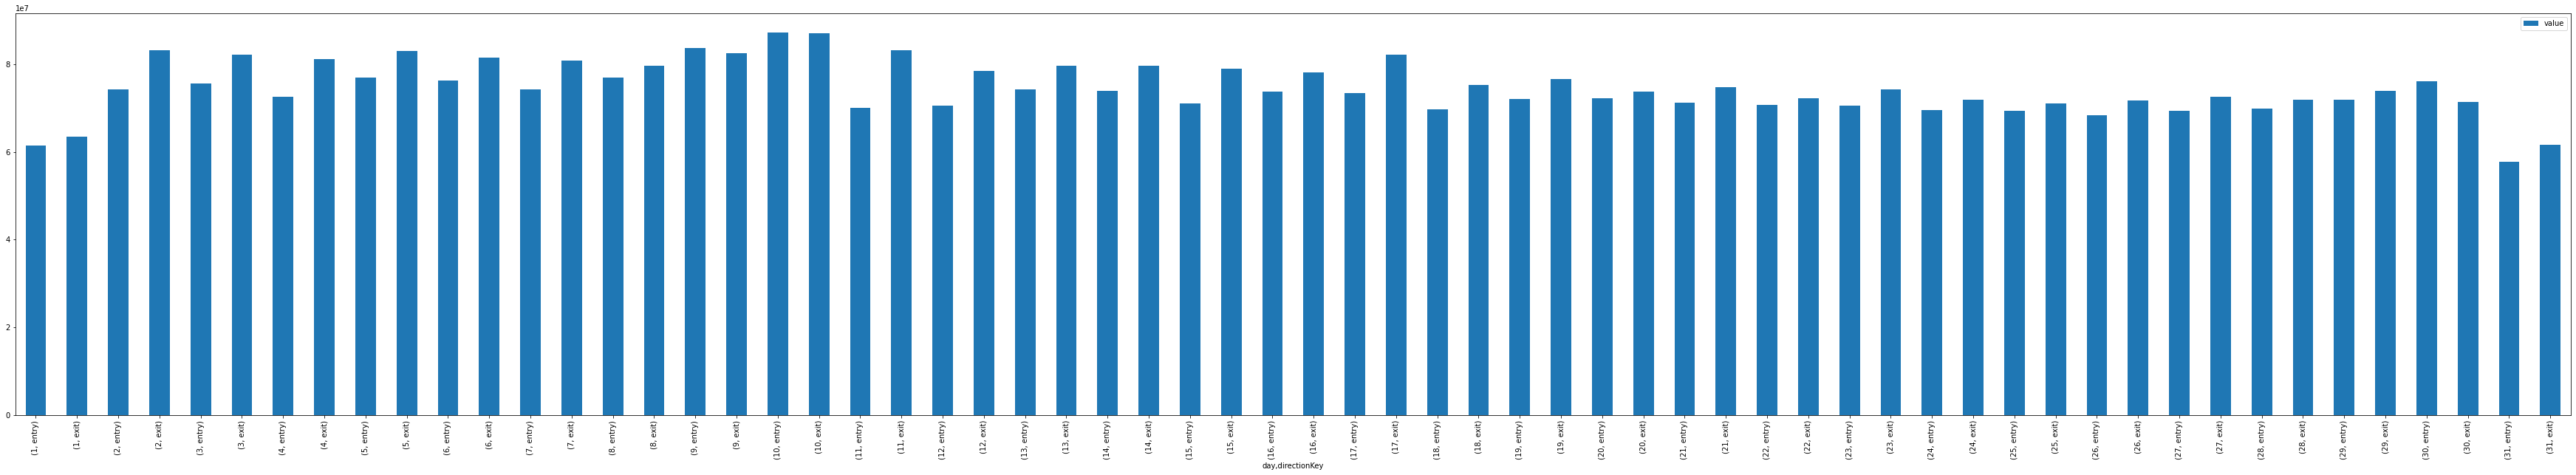

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))